# Python Data Analysis Assignment

### Objective: ###

The purpose of this assignment is to evaluate your ability to manipulate and visualize 
data using Python libraries such as NumPy, pandas, and Seaborn. You will be required to 
perform both univariate and bivariate analyses on a dataset to extract meaningful
insights.

### Dataset: ###

For this assignment, you can use any publicly available dataset. As an example, you 
might consider the "Titanic" dataset or any other dataset with numeric and categorical 
variables. Ensure you have at least 1000 rows and 10 columns in the dataset.

### Task 1:Data Cleaning and Preliminary Analysis ###

Loading the dataset into a pandas DataFrame

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('adult.data.csv',header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# These are the dimensions of the dataframe
data.shape

(32561, 15)

In [4]:
#setting the headers for each column
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'No_of_Projects_Done',
              'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
              'Capital_gain','Capital_loss','Hrs/wk','Native_country', 'Salary']

Here the null values are represented as '?' in the dataset. So I replaced with None

In [5]:
data.replace(' ?', None, inplace = True)
data_dup = data.copy()
#Duplicating the data in data_dup for future tasks

In [6]:
#Total number of null values in each column
data.isnull().sum()

Age                       0
Workclass              1836
Fnlwgt                    0
Education                 0
No_of_Projects_Done       0
Marital_Status            0
Occupation             1843
Relationship              0
Race                      0
Gender                    0
Capital_gain              0
Capital_loss              0
Hrs/wk                    0
Native_country          583
Salary                    0
dtype: int64

Handling the missing values by removing the null value rows

In [7]:
data.dropna(inplace = True)
data.head()

,Age,Workclass,Fnlwgt,Education,No_of_Projects_Done,Marital_Status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,Hrs/wk,Native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
#after removing the null values, this is the dimensions of the new dataframe
data.shape

(30162, 15)

In [9]:
#checking whether all null values are removed or not
data.isnull().sum()

Age                    0
Workclass              0
Fnlwgt                 0
Education              0
No_of_Projects_Done    0
Marital_Status         0
Occupation             0
Relationship           0
Race                   0
Gender                 0
Capital_gain           0
Capital_loss           0
Hrs/wk                 0
Native_country         0
Salary                 0
dtype: int64

A brief description of each column (datatype, number of unique values, mean, and standard deviation for numerical columns)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  30162 non-null  int64 
 1   Workclass            30162 non-null  object
 2   Fnlwgt               30162 non-null  int64 
 3   Education            30162 non-null  object
 4   No_of_Projects_Done  30162 non-null  int64 
 5   Marital_Status       30162 non-null  object
 6   Occupation           30162 non-null  object
 7   Relationship         30162 non-null  object
 8   Race                 30162 non-null  object
 9   Gender               30162 non-null  object
 10  Capital_gain         30162 non-null  int64 
 11  Capital_loss         30162 non-null  int64 
 12  Hrs/wk               30162 non-null  int64 
 13  Native_country       30162 non-null  object
 14  Salary               30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
#number of unique values in each column
data.nunique()

Age                       72
Workclass                  7
Fnlwgt                 20263
Education                 16
No_of_Projects_Done       16
Marital_Status             7
Occupation                14
Relationship               6
Race                       5
Gender                     2
Capital_gain             118
Capital_loss              90
Hrs/wk                    94
Native_country            41
Salary                     2
dtype: int64

In [12]:
data.describe()

,Age,Fnlwgt,No_of_Projects_Done,Capital_gain,Capital_loss,Hrs/wk
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Task 2: NumPy Tasks ###

Converting all numerical columns into NumPy arrays.

In [13]:
columns = ['Age','Fnlwgt','No_of_Projects_Done','Capital_gain','Capital_loss','Hrs/wk']
df = data[columns]
df1 = df.to_numpy()

Computing the mean, median, and standard deviation for all numerical 
columns using NumPy

In [14]:
mean_n = df1.mean(axis = 0)
mdn_n = np.median(df1, axis = 0)
std_n = np.std(df1, axis = 0)
for i in range(len(columns)):
    print('In {} column \n mean = {:.2f} \n median =  {:.2f} \n Standard Deviation = {:.2f}'.format(columns[i],
                                                                                                    mean_n[i],mdn_n[i],std_n[i]))

In Age column 
 mean = 38.44 
 median =  37.00 
 Standard Deviation = 13.13
In Fnlwgt column 
 mean = 189793.83 
 median =  178425.00 
 Standard Deviation = 105651.22
In No_of_Projects_Done column 
 mean = 10.12 
 median =  10.00 
 Standard Deviation = 2.55
In Capital_gain column 
 mean = 1092.01 
 median =  0.00 
 Standard Deviation = 7406.22
In Capital_loss column 
 mean = 88.37 
 median =  0.00 
 Standard Deviation = 404.29
In Hrs/wk column 
 mean = 40.93 
 median =  40.00 
 Standard Deviation = 11.98


Correlation coefficient between Age column and No_of_Projects_Done column

In [15]:
np.corrcoef(df['Age'],df['No_of_Projects_Done'])

array([[1.        , 0.04352609],
       [0.04352609, 1.        ]])

Correlation coefficient between Capital_gain column and Hrs/wk column

In [16]:
np.corrcoef(df['Capital_gain'],df['Hrs/wk'])

array([[1.       , 0.0804318],
       [0.0804318, 1.       ]])

### Task 3: Univariate Analysis ###

Plotting the distribution of 'Age', 'No_of_Projects_Done', 'Fnlwgt' columns using Seaborn

In [17]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline 
warnings.simplefilter(action='ignore', category=FutureWarning) # supress future warning

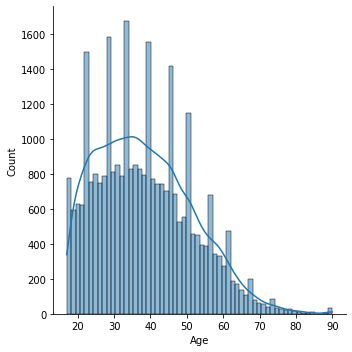

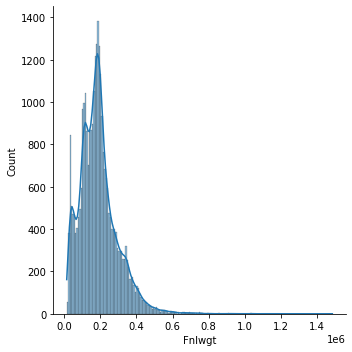

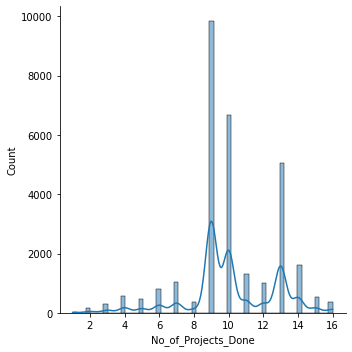

In [18]:
sns.displot(df['Age'], kde = True)
sns.displot(df['Fnlwgt'], kde = True)
sns.displot(df['No_of_Projects_Done'], kde = True)

Plotting the count distribution of Education column and Relationship column

<AxesSubplot:xlabel='Education', ylabel='count'>

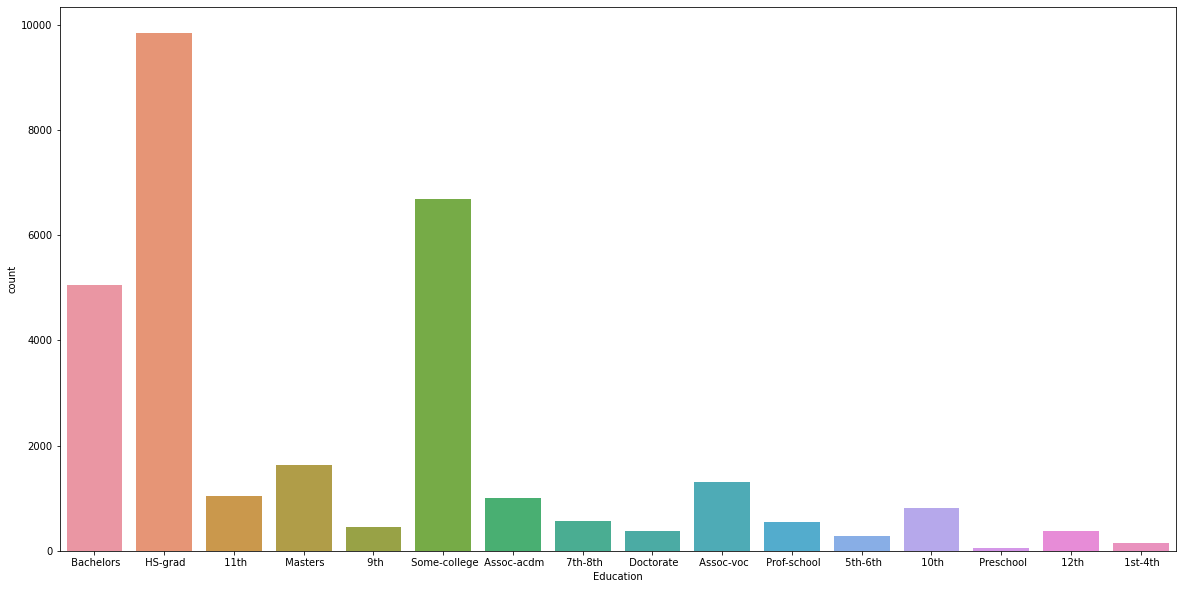

In [19]:
fig = plt.subplots(figsize=(20,10)) #intializing the figure dimensions
sns.countplot(x = 'Education', data = data)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

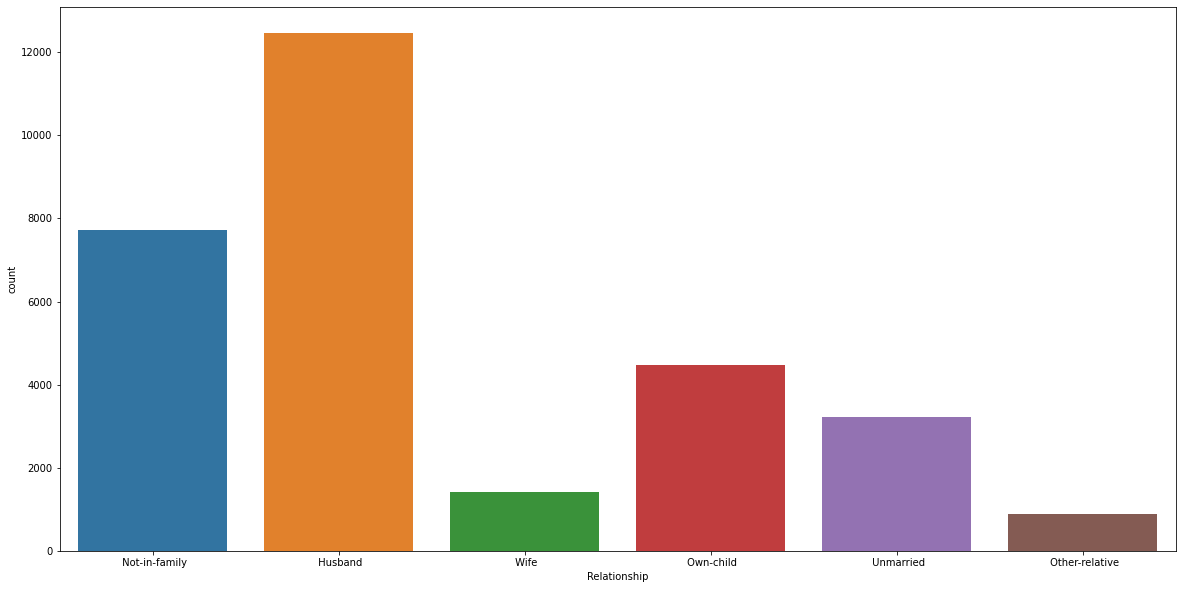

In [20]:
fig = plt.subplots(figsize=(20,10))
sns.countplot(data['Relationship'],data=data)

### Task 4: Bivariate Analysis ###

A scatter plot between Capital_gain and Age

<AxesSubplot:xlabel='Age', ylabel='Capital_gain'>

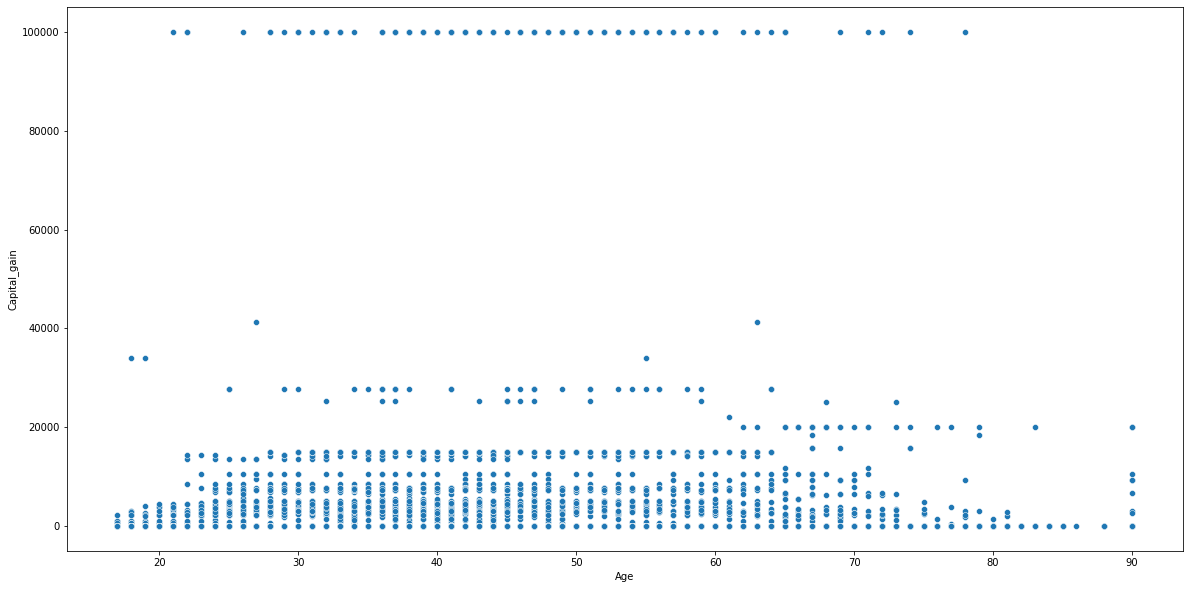

In [21]:
fig = plt.subplots(figsize=(20,10))
sns.scatterplot(y = 'Capital_gain', x = 'Age', data = df)

A boxplot showcasing the distribution of a Education column against an Age column.

<AxesSubplot:xlabel='Education', ylabel='Age'>

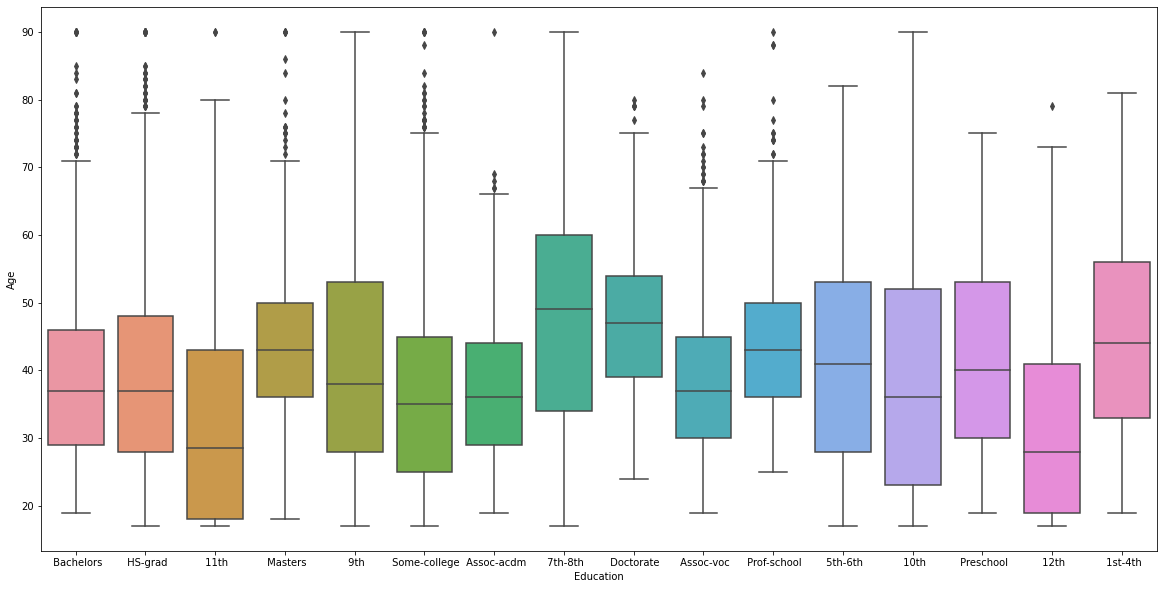

In [22]:
fig = plt.subplots(figsize=(20,10))
sns.boxplot(x = 'Education', y = 'Age', data = data)

Computing and visualizing the correlation matrix of the numerical columns

<AxesSubplot:>

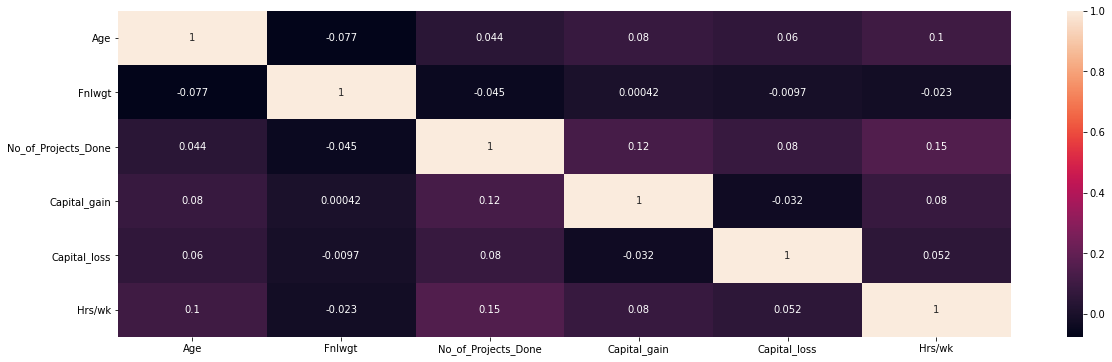

In [23]:
fig = plt.subplots(figsize = (20,6))
corr_mtx = df.corr()
sns.heatmap(corr_mtx,annot=True) #correlation matrix is in corr_mtx, but for better visualization I used heatmap

### Task 5: Advanced Questions ###

I am Choosing 'No_of_Projects_Done' numerical column to fit a simple linear regression model and to predict its 
values based on 'Hrs/wk' numerical column. Because as you can see in the above correlation matrix relation between 'No_of_Projects_Done' column and 'Hrs/wk' column is highest of all corrrelation matrix. So, This would be the best columns to choose if we have to predict a numerical column using another numerical column.

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X = df[['No_of_Projects_Done']]
Y = df['Hrs/wk']
lm = LinearRegression()

In [26]:
#Splitting the data in training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (24129, 1) (24129,)
Test set: (6033, 1) (6033,)


In [27]:
lm_model = lm.fit(X_train,Y_train)
y_pred = lm_model.predict(X_test)

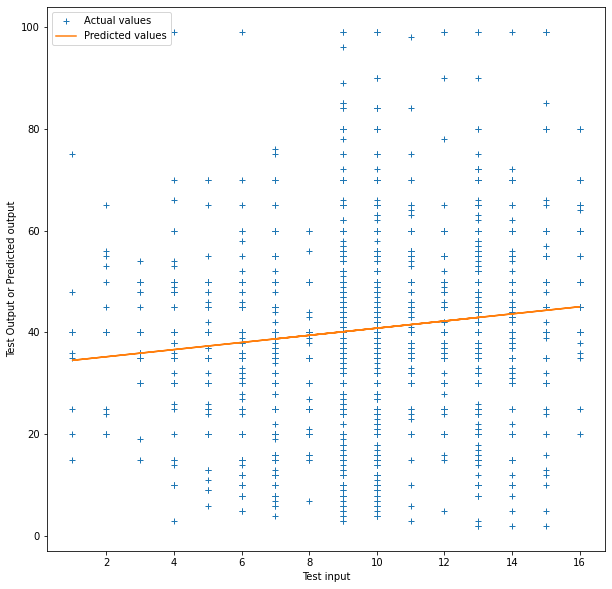

In [28]:
# Plotting the regression line of prediction data point with actual data point
plt.figure(figsize=(10,10))
plt.plot(X_test, Y_test, '+', label='Actual values')
plt.plot(X_test, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()

To make the prediction of the column better, we have to choose more than one column whether it may be numerical column or categorical column so that it can have the better and extra features to predict and get more accurate results.

Grouping the data by a 'Workclass' column and obtain the mean and standard 
deviation of all numerical columns for each group.

In [29]:
gtd=data.groupby('Workclass')[df.columns].agg(['mean','std']).reset_index()
gtd

Workclass        Age                    Fnlwgt                 \
                           mean        std           mean            std   
0        Federal-gov  42.577943  11.532840  185717.107105  117766.713221   
1          Local-gov  41.743106  12.267402  188422.886309  100654.252367   
2            Private  36.794355  12.842129  192719.985776  105981.547011   
3       Self-emp-inc  46.027933  12.689685  175775.219739   97355.381441   
4   Self-emp-not-inc  45.011605  13.364069  175222.506603  100657.849119   
5          State-gov  39.362002  12.386871  184440.424550  111202.987584   
6        Without-pay  47.785714  21.075610  174267.500000   85536.385921   

  No_of_Projects_Done           Capital_gain               Capital_loss  \
                 mean       std         mean           std         mean   
0           10.948038  2.100565   832.321315   4111.473884   111.731707   
1           11.036768  2.545539   829.230285   5375.040712   110.323174   
2            9.871085  2.484040   879.858207   6338.117016    79.629498   
3           11.167598  2.544997  4810.746741  17828.904145   153.504655   
4           10.211285  2.756639  1913.134454  11074.584412   115.572229   
5           11.349492  2.530994   684.306489   3771.592651    81.147772   
6            9.071429  1.685426   487.857143   1300.780467     0.000000   

                  Hrs/wk             
          std       mean        std  
0  451.148107  41.279958   8.720239  
1  440.372500  41.002419  10.760325  
2  383.173354  40.250875  11.264958  
3  546.910433  48.802607  13.777156  
4  465.740922  44.432173  16.682636  
5  388.739091  39.053948  11.669861  
6    0.000000  32.714286  17.357900

### Task 6: Bonus ###

Visualizing a pair plot of the dataset (using Seaborn) to showcase relationships 
between all numerical columns.

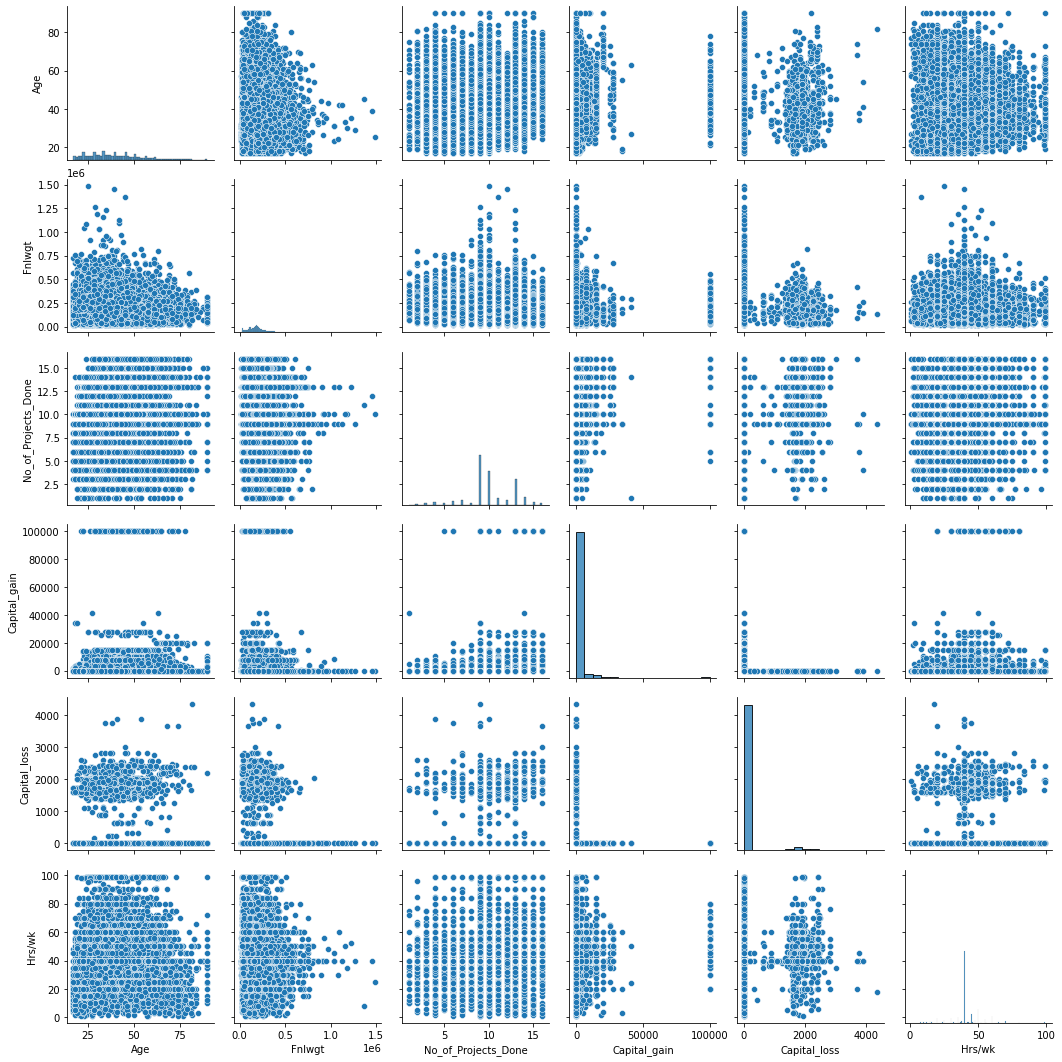

In [30]:
sns.pairplot(df)

Generating a heat map of missing values in the dataset.

<AxesSubplot:>

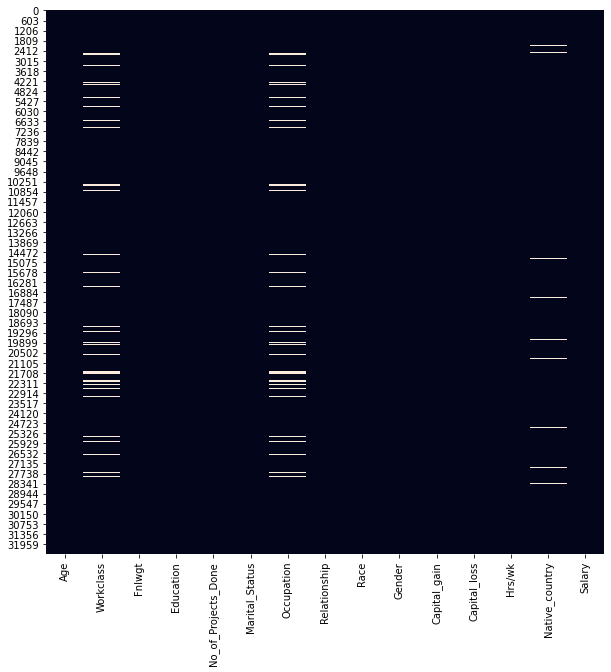

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(data_dup.isnull(),cbar=False)

In [32]:
#null values in the columns to compare the above figure
data_dup.isnull().sum()

Age                       0
Workclass              1836
Fnlwgt                    0
Education                 0
No_of_Projects_Done       0
Marital_Status            0
Occupation             1843
Relationship              0
Race                      0
Gender                    0
Capital_gain              0
Capital_loss              0
Hrs/wk                    0
Native_country          583
Salary                    0
dtype: int64